In [1]:
#Importation of libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import seaborn as sns

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
#Importing our dataset
tripadvisor = pd.read_csv('tripadvisor_review.csv')

In [4]:
tripadvisor.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [5]:
# Renaming the first columns of our data frame
tripadvisor.rename(columns = {'Category 1' : 'Art-galleries', 'Category 2' : 'Dance-clubs', 'Category 3' : 'Juice-bars', 'Category 4' : 'Restaurants', 'Category 5' : 'Museums', 'Category 6' : 'Resorts', 'Category 7' : 'Parks/Picnic-spots', 'Category 8' : 'Beaches', 'Category 9' : 'Theaters','Category 10' : 'Religious institutions'}, 
                  inplace = True)

In [6]:
#View the renamed columns
tripadvisor.head()

,User ID,Art-galleries,Dance-clubs,Juice-bars,Restaurants,Museums,Resorts,Parks/Picnic-spots,Beaches,Theaters,Religious institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [7]:
#Rounding off the oredinal values
tripadvisor.round(0)

,User ID,Art-galleries,Dance-clubs,Juice-bars,Restaurants,Museums,Resorts,Parks/Picnic-spots,Beaches,Theaters,Religious institutions
0,User 1,1.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0,2.0,2.0
1,User 2,1.0,2.0,3.0,1.0,1.0,3.0,3.0,3.0,2.0,2.0
2,User 3,1.0,1.0,1.0,1.0,0.0,2.0,3.0,3.0,1.0,2.0
3,User 4,0.0,2.0,0.0,1.0,0.0,2.0,3.0,3.0,2.0,3.0
4,User 5,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,1.0,1.0,0.0,1.0,1.0,1.0,3.0,3.0,1.0,3.0
976,User 977,1.0,1.0,1.0,0.0,1.0,2.0,3.0,3.0,1.0,3.0
977,User 978,1.0,1.0,1.0,0.0,1.0,2.0,3.0,3.0,1.0,3.0
978,User 979,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,2.0


In [8]:
tripadvisor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 980 non-null    object 
 1   Art-galleries           980 non-null    float64
 2   Dance-clubs             980 non-null    float64
 3   Juice-bars              980 non-null    float64
 4   Restaurants             980 non-null    float64
 5   Museums                 980 non-null    float64
 6   Resorts                 980 non-null    float64
 7   Parks/Picnic-spots      980 non-null    float64
 8   Beaches                 980 non-null    float64
 9   Theaters                980 non-null    float64
 10  Religious institutions  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [9]:
tripadvisor.describe()

,Art-galleries,Dance-clubs,Juice-bars,Restaurants,Museums,Resorts,Parks/Picnic-spots,Beaches,Theaters,Religious institutions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


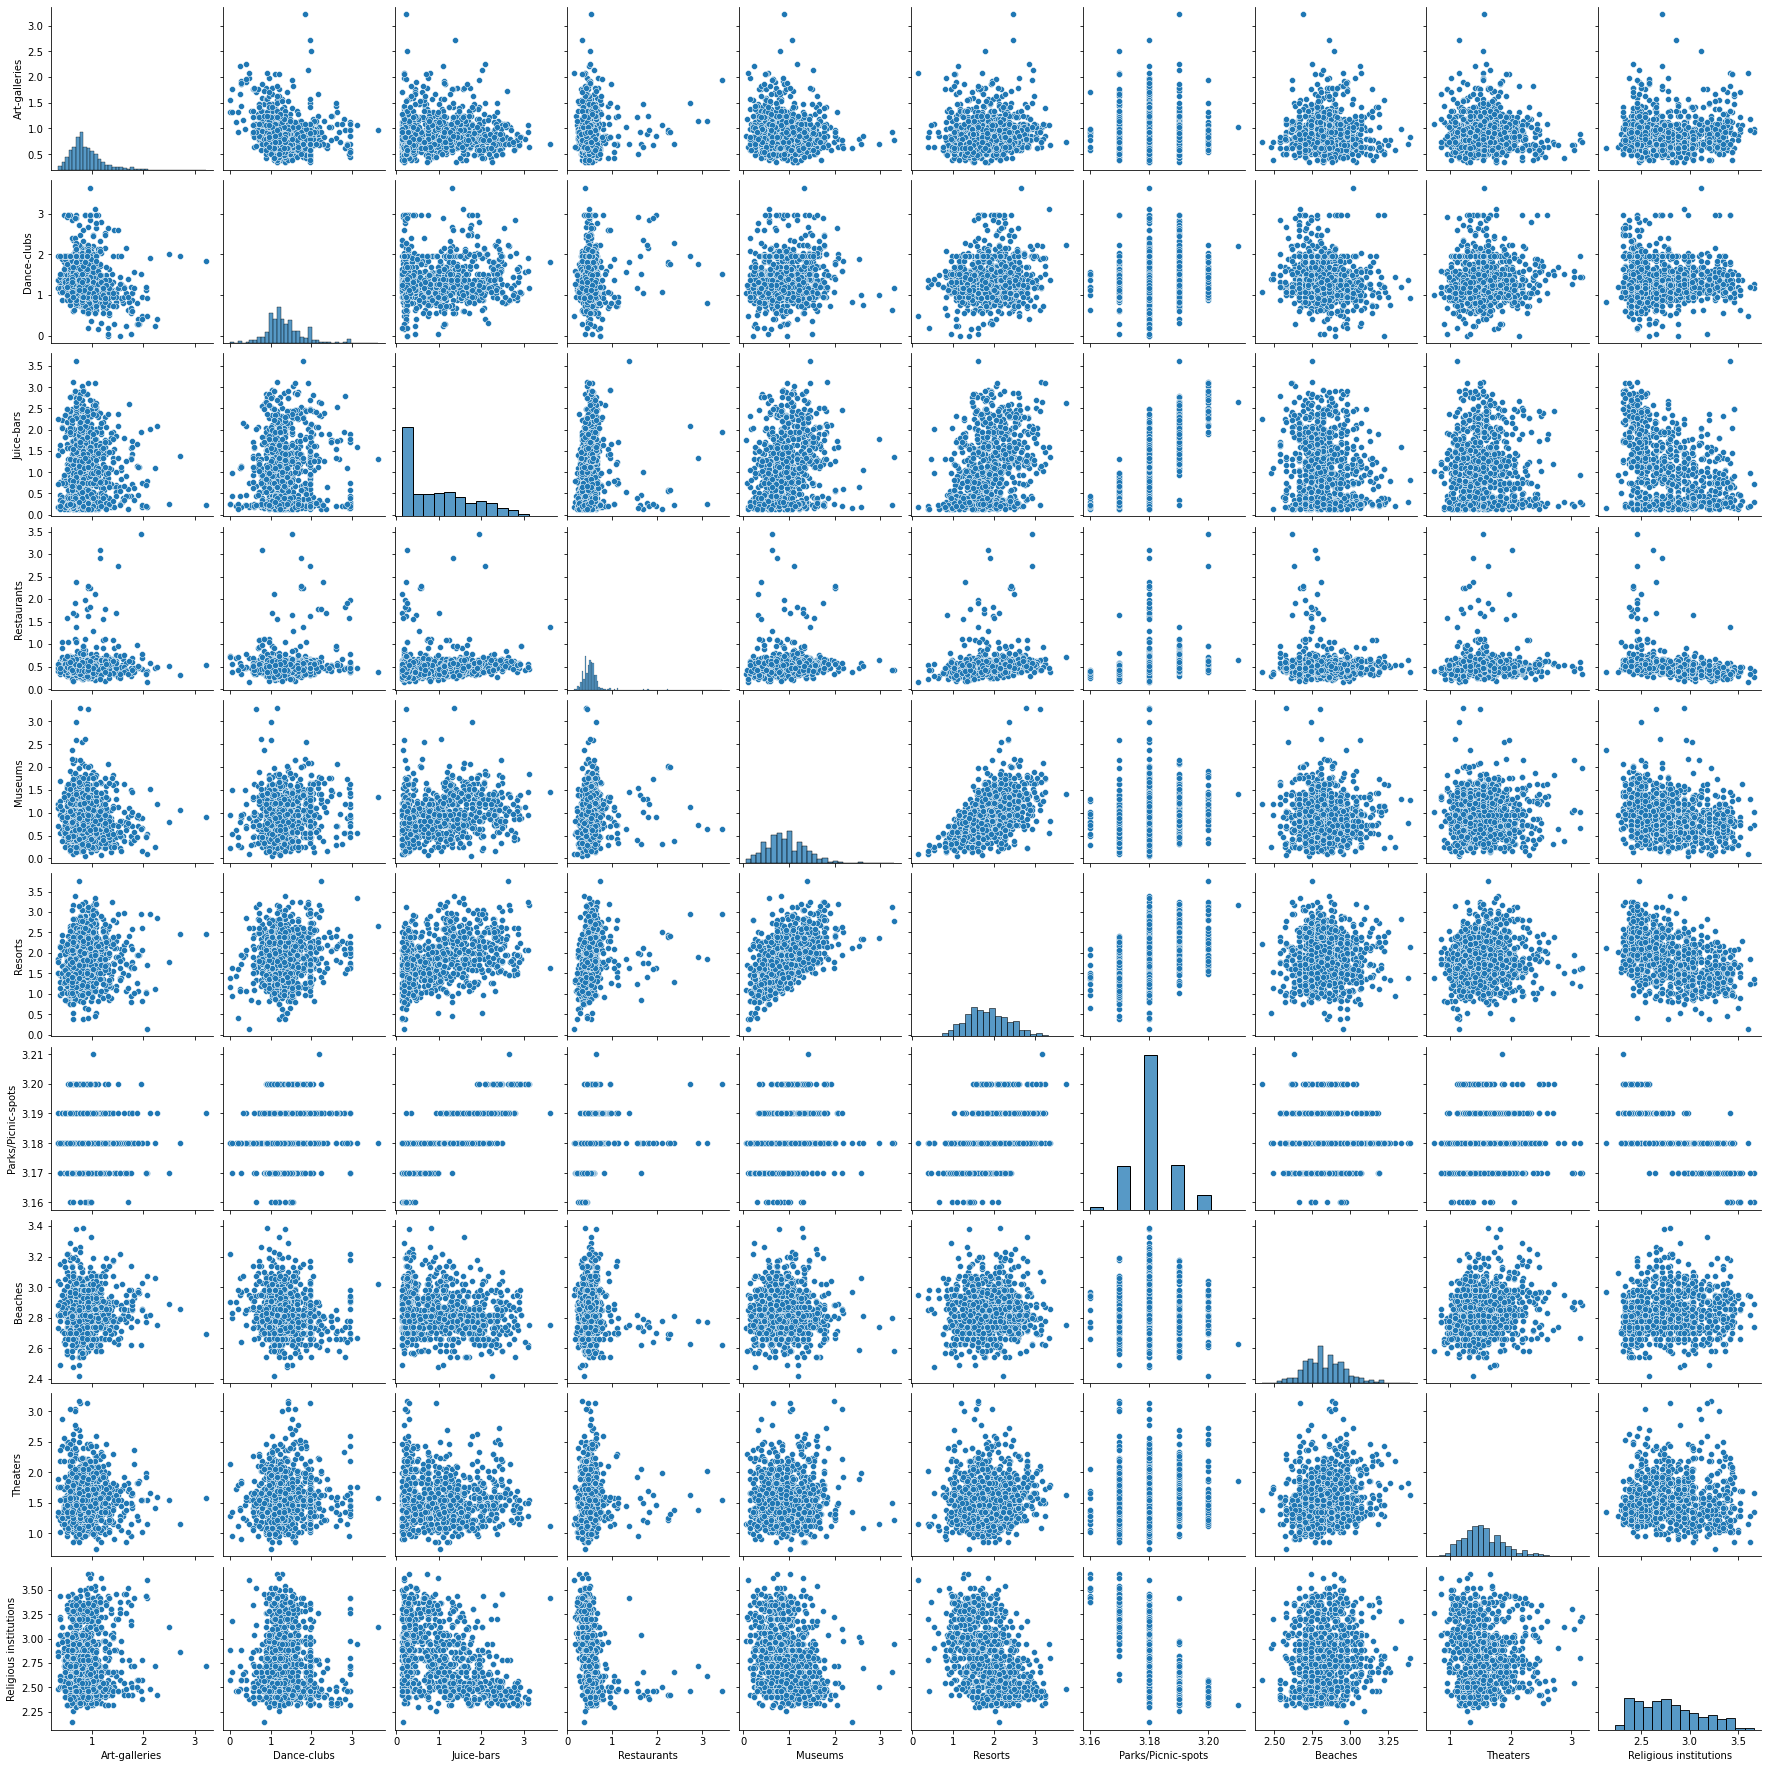

In [10]:
sns.pairplot(tripadvisor.iloc[:,[1,2,3,4,5,6,7,8,9,10]])

In [11]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
X = tripadvisor.iloc[:,[1,2,3,4,5,6,7,8,9,10]].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

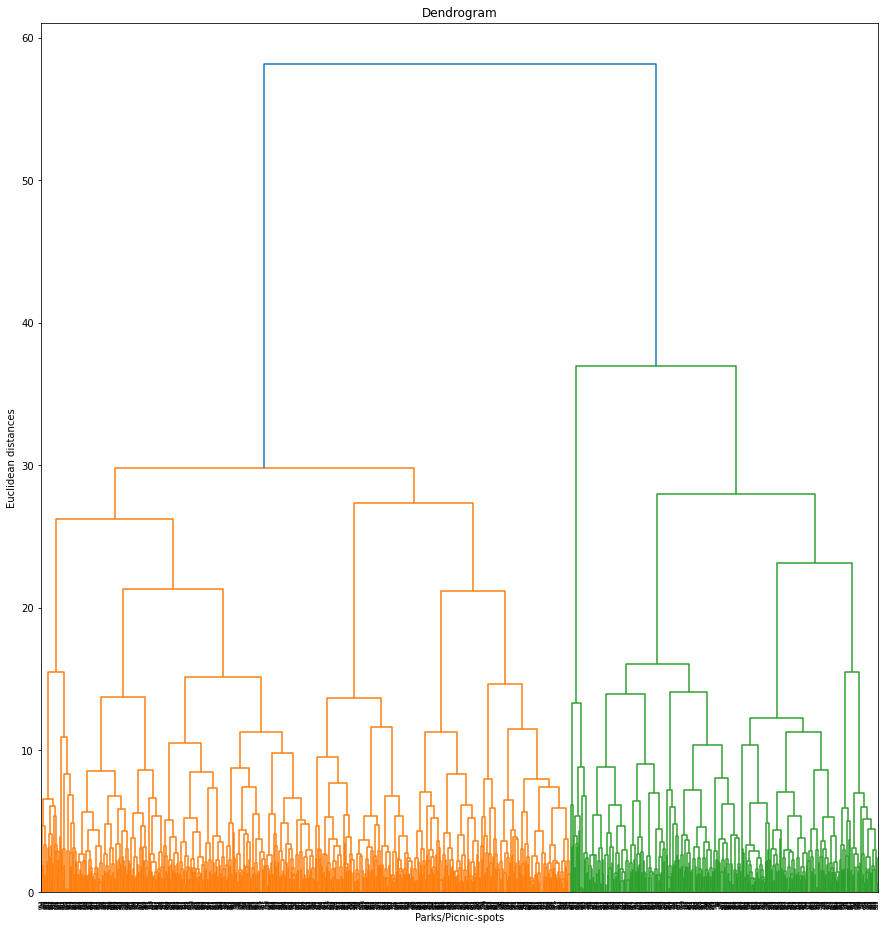

In [12]:
#finding the number of clusters with dendrogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 16))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Parks/Picnic-spots')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
#Applying Hierarchichal clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [14]:
# Using PCA to reduce the dimensionality of our dataset since it it multidimensional
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.29775044, 0.1262794 , 0.12330993, 0.10644704, 0.10198197,
       0.08079816, 0.07044547])

In [15]:
sum(pca.explained_variance_ratio_)

0.9070124030123078

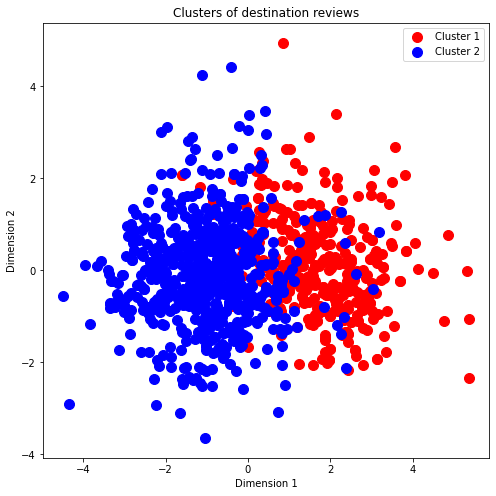

In [16]:
colours = ['red', 'blue']

plt.figure(figsize=(8,8))
for i in range(2):
    plt.scatter(X_reduced[y_hc == i, 0], X_reduced[y_hc == i, 1],
               s = 100, c = colours[i], label = 'Cluster '+str(i+1))
plt.title('Clusters of destination reviews')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [17]:
cluster_report = %run cluster_report.ipynb

In [20]:
cluster_report(X_reduced, y_hc, min_sample_leaf = 20, pruning_level = 0.05)

TypeError: 'NoneType' object is not callable